<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data collection

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [14]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [15]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 365)
start, end

(datetime.datetime(2023, 10, 31, 19, 36, 25, 993578),
 datetime.datetime(2024, 10, 30, 19, 36, 25, 993578))

In [16]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [17]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                       Adj Close                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-10-31 00:00:00+00:00  169.900604  335.591034  40.767666  200.839996   
2023-11-01 00:00:00+00:00  173.084305  343.491760  42.312202  205.660004   
2023-11-02 00:00:00+00:00  176.665985  345.725006  43.492840  218.509995   
2023-11-03 00:00:00+00:00  175.750671  350.171570  44.991390  219.960007   
2023-11-06 00:00:00+00:00  178.317535  353.873810  45.737164  219.270004   

Price                           Close                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-10-31 00:00:00+00:00  170.770004  338.109985  40.779999  200.839996   
2023-11-01 00:00:00+00:00  173.970001  346.070007  42.325001  205.660004   
2023-11-02 00:00:00+00:00  177.570007  348.320007  43.506001  218.509995   
2023-11-03 00:00:00+00:00  176.649994  352.799988  45.005001  219.960007   
2023-11-06 00:00:00+00:00  179.229996  356.529999  45.750999  219.270004   

Price                            High              ...        Low              \
Ticker                           AAPL        MSFT  ...       NVDA        TSLA   
Date                                               ...                          
2023-10-31 00:00:00+00:00  170.899994  339.000000  ...  39.230000  194.070007   
2023-11-01 00:00:00+00:00  174.229996  347.420013  ...  40.868999  197.850006   
2023-11-02 00:00:00+00:00  177.779999  348.829987  ...  42.894001  211.449997   
2023-11-03 00:00:00+00:00  176.820007  354.390015  ...  43.723000  218.399994   
2023-11-06 00:00:00+00:00  179.429993  357.540009  ...  44.898998  215.000000   

Price                            Open                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-10-31 00:00:00+00:00  169.350006  338.850006  40.450001  196.119995   
2023-11-01 00:00:00+00:00  171.000000  339.790009  40.883999  204.039993   
2023-11-02 00:00:00+00:00  175.520004  347.239990  43.327999  212.970001   
2023-11-03 00:00:00+00:00  174.240005  349.630005  44.020000  221.149994   
2023-11-06 00:00:00+00:00  176.380005  353.450012  45.285000  223.979996   

Price                        Volume                                  
Ticker                         AAPL      MSFT       NVDA       TSLA  
Date                                                                 
2023-10-31 00:00:00+00:00  44846000  20265300  517969000  118068300  
2023-11-01 00:00:00+00:00  56934900  28158800  437593000  121661700  
2023-11-02 00:00:00+00:00  77334800  24348100  409172000  125987600  
2023-11-03 00:00:00+00:00  79763700  23624000  424610000  119281000  
2023-11-06 00:00:00+00:00  63841300  23828300  400733000  117335800  

[5 rows x 24 columns]

In [18]:
df.index

DatetimeIndex(['2023-10-31 00:00:00+00:00', '2023-11-01 00:00:00+00:00',
               '2023-11-02 00:00:00+00:00', '2023-11-03 00:00:00+00:00',
               '2023-11-06 00:00:00+00:00', '2023-11-07 00:00:00+00:00',
               '2023-11-08 00:00:00+00:00', '2023-11-09 00:00:00+00:00',
               '2023-11-10 00:00:00+00:00', '2023-11-13 00:00:00+00:00',
               ...
               '2024-10-17 00:00:00+00:00', '2024-10-18 00:00:00+00:00',
               '2024-10-21 00:00:00+00:00', '2024-10-22 00:00:00+00:00',
               '2024-10-23 00:00:00+00:00', '2024-10-24 00:00:00+00:00',
               '2024-10-25 00:00:00+00:00', '2024-10-28 00:00:00+00:00',
               '2024-10-29 00:00:00+00:00', '2024-10-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=252, freq=None)

In [19]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [20]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
2023-10-31 00:00:00+00:00,170.770004,338.109985,40.779999,200.839996
2023-11-01 00:00:00+00:00,173.970001,346.070007,42.325001,205.660004
2023-11-02 00:00:00+00:00,177.570007,348.320007,43.506001,218.509995
2023-11-03 00:00:00+00:00,176.649994,352.799988,45.005001,219.960007
2023-11-06 00:00:00+00:00,179.229996,356.529999,45.750999,219.270004


In [21]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,252.000000,252.000000,252.000000,252.000000
mean,199.043155,410.448968,92.490603,209.237421
std,21.341075,24.936267,30.391158,30.621315
min,165.000000,338.109985,40.779999,142.050003
25%,182.667496,399.005005,62.963750,180.004997
50%,192.474998,414.625000,90.751999,209.919998
75%,221.340004,425.240005,120.893501,237.430004
max,236.479996,467.559998,143.710007,269.190002


<Axes: xlabel='Date'>

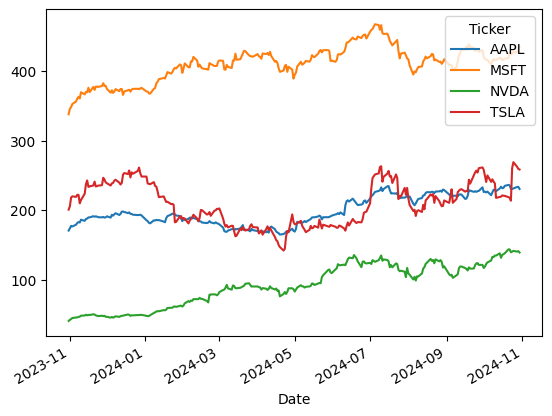

In [22]:
Close.plot()

# Twitter Data Collection
https://www.youtube.com/watch?v=AFeXivA7Hh4

In [24]:
#following this tutorial https://www.youtube.com/watch?v=AFeXivA7Hh4
import requests
import pandas as pd


In [25]:
twitter_data = []

In [26]:
%%time
from google.colab import userdata
import requests
import pandas as pd
# Retrieve the 'twitter_api_key' secret from Colab
twitter_api_key = userdata.get('twitter_api_key')


payload = {
    'api_key': twitter_api_key,
    'query':'Stock',
    'num': '10'

}
response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)

# Check the response status code
if response.status_code == 200:
  data = response.json()
  # Proceed with processing the JSON data
else:
  print(f"Error: Request failed with status code {response.status_code}")
  print(response.text) # Print the response content to see the error message

CPU times: user 55.3 ms, sys: 2.65 ms, total: 58 ms
Wall time: 6.32 s


In [27]:
data

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "PayPal boosts profit outlook, but its stock falls after earnings ... PayPal beat big on a profit metric, but here's why its stock is falling · From\xa0...",
   'highlighs': ['stock', 'stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Stocktwits',
   'snippet': '✓ EPS of $2.12, beating expectations of $1.84 ✓ Revenue of $88.3B, beating expectations of $86.3B Stock is up 2.08% after hours Listen to the call LIVE on\xa0...',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stocktwits',
   'displayed_link': '1M+ followers'},
  {'position': 2,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸',
   'highlighs': 

In [30]:
from pprint import pprint

print(f"The type of data is: {type(data)}")
print("Here is the content of data:")
pprint(data)

The type of data is: <class 'dict'>
Here is the content of data:
{'organic_results': [{'displayed_link': '4.6M+ followers',
                      'highlighs': ['stock', 'stock'],
                      'link': 'https://twitter.com/marketwatch',
                      'position': 0,
                      'snippet': 'PayPal boosts profit outlook, but its stock '
                                 'falls after earnings ... PayPal beat big on '
                                 "a profit metric, but here's why its stock is "
                                 'falling · From\xa0...',
                      'title': 'MarketWatch'},
                     {'displayed_link': '1M+ followers',
                      'highlighs': ['Stock'],
                      'link': 'https://twitter.com/stocktwits',
                      'position': 1,
                      'snippet': '✓ EPS of $2.12, beating expectations of '
                                 '$1.84 ✓ Revenue of $88.3B, beating '
                      

# RabbitMQ

How to procede?
Preprocess the data and EDA:


In [38]:
print(data)

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'}, 'organic_results': [{'position': 0, 'title': 'MarketWatch', 'snippet': "PayPal boosts profit outlook, but its stock falls after earnings ... PayPal beat big on a profit metric, but here's why its stock is falling · From\xa0...", 'highlighs': ['stock', 'stock'], 'link': 'https://twitter.com/marketwatch', 'displayed_link': '4.6M+ followers'}, {'position': 1, 'title': 'Stocktwits', 'snippet': '✓ EPS of $2.12, beating expectations of $1.84 ✓ Revenue of $88.3B, beating expectations of $86.3B Stock is up 2.08% after hours Listen to the call LIVE on\xa0...', 'highlighs': ['Stock'], 'link': 'https://twitter.com/stocktwits', 'displayed_link': '1M+ followers'}, {'position': 2, 'title': 'Brad Freeman (@StockMarketNerd) ...', 'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸', 'highlighs': ['Stock'], 'link': 'https://twitter.com/stoc

In [37]:
import pandas as pd
import re

def preprocess_text(text):
  """Preprocesses text data by removing URLs, mentions, hashtags, and special characters."""
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text


# # Example usage with Reddit data:
# preprocessed_reddit_titles = [preprocess_text(post.title) for post in top_posts]
# preprocessed_reddit_comments = []
# for post in top_posts:
#     submission = reddit.submission(id=post.id)
#     submission.comments.replace_more(limit=0)
#     for comment in submission.comments.list():
#         preprocessed_reddit_comments.append(preprocess_text(comment.body))

import pandas as pd
import re

def preprocess_text(text):
  """Preprocesses text data by removing URLs, mentions, hashtags, and special characters."""
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text


# # Example usage with Reddit data:
# preprocessed_reddit_titles = [preprocess_text(post.title) for post in top_posts]
# preprocessed_reddit_comments = []
# for post in top_posts:
#     submission = reddit.submission(id=post.id)
#     submission.comments.replace_more(limit=0)
#     for comment in submission.comments.list():
#         preprocessed_reddit_comments.append(preprocess_text(comment.body))
preprocessed_twitter_data = []
def process_data(data):
    if data is None:
        print("No data provided.")
    elif isinstance(data, dict) and 'organic_results' in data and isinstance(data['organic_results'], list):
        # Process the list of organic results
        for result in data['organic_results']:
            #print(result)
            #The following line was fixed by changing the indentation to 4 spaces
            preprocessed_twitter_data.append(preprocess_text(tweet['snippet']))
    else:
        print("Data is not in the expected format.")

#preprocessed_twitter_data = process_data(data)


# preprocessed_reddit_titles
# preprocessed_reddit_comments
# preprocessed_twitter_data
#pprint(preprocessed_twitter_data)

None


In [39]:
# data = preprocessed_twitter_data
# if isinstance(data, list) and len(data) > 0:  # Check if data is in the expected format
#     for tweet in data:
#         preprocessed_twitter_data.append(preprocess_text(tweet['text']))
#     data
# elif isinstance(data, dict) and 'results' in data and isinstance(data['results'], list): #handle different response structures
#     for tweet in data['results']:
#         if 'text' in tweet:  # check for the 'text' key
#             preprocessed_twitter_data.append(preprocess_text(tweet['text']))
#     data
# else:
#     print("Unexpected format of Twitter data.")


In [40]:
print(data.keys())

dict_keys(['search_information', 'organic_results', 'related_searches', 'pagination'])


In [82]:
# class RabbitMQConnection:
#   def publish_to_rabbitmq(queue_name: str, data:str):
#     """a simple class to manage a connection to a RabbitMQ server."""
#     try:
#       rabbitmq_con = RabbitMQConnection()
#       with rabbitmq_conn:
#         channel = rabbitmq_conn.get_channel()
#         channel.queue_declar(queue = queue_name, durable = True)
#         channel.confirm_delivery()
#         channel.basic_publish(exchange = '', routing_key = queue_name, body = data, properties = pika.BasicProperties(delivery_mode = 2))
#         print("Sent data to RabbitMQ", data)
#     except pika.xceptions.UnroutableError:
#       print("Message could not be routed")
#     except Exception as e:
#       print(f"Error publishing to RabbitMQ: {e}")



In [40]:

from datetime import datetime
params = {"date":datetime.now , "subreddit": 'stocks' }
#other possible params T
def collect(params):
  response = requests.get('https://api.scraperapi.com/structured/twitter/search', params=payload)
  data=response.json()#dict(dict) {“organic_data”: []}

for result in data["organic_results"]:
  for tweet in data["organic_results"]:
    Text = tweet['snippet']
    Text = preprocess_text(preprocessed_twitter_data)
    pubish_to_rabbitmq(bot, Text)

TypeError: expected string or bytes-like object

# Reddit Data Collection

https://www.youtube.com/watch?v=8KrUCXlAN4Q

In [3]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 10.0 MB/s eta 0:00:00


In [4]:
import praw
import asyncpraw
import asyncio
from datetime import datetime, timedelta

In [7]:
from google.colab import userdata
client_id = userdata.get('client_id')
client_secret = userdata.get('client_secret')

reddit = praw.Reddit(client_id= client_id,
                     client_secret=client_secret,
                     user_agent='StockBot')

In [8]:

%%time
subreddit = reddit.subreddit('wallstreetbets')

for post in subreddit.hot(limit=10):
    print(f"Title: {post.title}")
    # print(f"Content: {post.selftext}")
    print(f"Author: {post.author}")
    print(f"Upvotes: {post.score}")
    print(f"Comments: {post.num_comments}")
    print(f"URL: {post.url}")
    # print('-' * 80)
    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        print(comment.body)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: What Are Your Moves Tomorrow, October 31, 2024
Author: wsbapp
Upvotes: 159
Comments: 5202
URL: https://www.reddit.com/r/wallstreetbets/comments/1gfvose/what_are_your_moves_tomorrow_october_31_2024/


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Used car company worth more than the companies of the cars it’s selling. LMFAO ![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4267)
I inversed WSB on RDDT and got burned Learned the lesson and listened WSB on HOOD and got double burned THERE'S NO WIN!!!
Upvote if u too are in shambles ![img](emote|t5_2th52|31225)
Carvana 1000% cooking the books
CVNA up 10% off made up numbers they just scribbled down 20 mins ago
**CVNA CAN'T KEEP GETTING AWAY WITH THIS** ![img](emote|t5_2th52|27421)![img](emote|t5_2th52|27421)![img](emote|t5_2th52|27421)![img](emote|t5_2th52|27421)![img](emote|t5_2th52|27421)![img](emote|t5_2th52|27421)![img](emote|t5_2th52|27421)
Carvana makes an average of 7,400 dollars a car because Millennials are too afraid to talk to a car salesman...

![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



If this comment reaches ~~20~~ ~~30~~ ~~40~~ 200 upvotes, I'll full port on PayPal
Monday - TransMedics calls

Tuesday - Alphabet calls 

Thursday - Uber and Amazon calls ![img](emote|t5_2th52|29637)![img](emote|t5_2th52|18630) 

Friday - Wendy's application ![img](emote|t5_2th52|52627)
Monday: nothing 

Tuesday: sell AMDL and Google shares after hours, about 15% and 10% gain, respectively. Buy lilly 2x ETF with gains

Wednesday morning: sell lilly 2xetf for about 11.5% gain Close out Google leaps for roughly 93% gain
Close Google weeklies for about 230% gain

Wednesday after hours: close meta shares for about 8% gain


Do not play Microsoft 

All in on Uber after hours Wednesday when it touches 76.38 a share

Sell Uber Thursday for 10% gain

Don't add to Amazon position, sell at 202 a share


Don't play apple


It is literally this easy, I will make roughly 348,000 dollars

Edit: I forgot a decimal. I will make 348.00 dollars

Edit 2: exited Google and AMDL before close
10% on AMDL (5

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 3 years ago
**Total Comments** | 1 | **Previous Best DD** | 
**Account Age** | 6 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
They beat earnings, I cheer, I have made seven US dollars
My $5 is going to moon
Not far off from me with LLY 😂
Felt that way being allowed to vote on Microsoft’s annual board meeting agenda with .9 shares of their stock in my portfolio.  It was pretty funny.
Voting NO on the ceo pay raise because your 1 share went down in price
Plottwist: Its a BRK.A share...
Boss makes a dollar, I make a dime, that's why I research trades on company time
Shares are sharea
Buy me out then.
true lmao
Lol.
When do JOBY and ACHR earnings come out? Post or pre election?
I demand a chair at the table 😤
![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)
Big decision…..buy more, sell, or hold?

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 3 years ago
**Total Comments** | 3 | **Previous Best DD** | 
**Account Age** | 5 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Casino Confirmed
If you voted, is that insider trading?

Edit: Damn guys, one of my dumbest throw away comments. 

Go vote.
https://preview.redd.it/qrqmv0g95yxd1.png?width=477&format=png&auto=webp&s=8b7bf753cabc4102078eeecf47bce8f89aa15400

This is a painful disclosure.
They’re scraping 2¢ on each side of the trade. 4¢ per contract.

Almost makes me wanna buy HOOD
Need a collab with DraftKings so I can parlay this with the Chiefs 3-peat and another Freddie Freeman homerun!
I deleted robinhood for my own sanity. Is this real or satire?
https://preview.redd.it/w01pzl507yxd1.png?width=600&format=png&auto=webp&s=14b63d8712641aaabadec110d59255bd2ad26edc
It’s not gambling it’s some derivative contracted optional risk strategy thing
I'm not eligible, which suck

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | just now
**Total Comments** | 0 | **Previous Best DD** | 
**Account Age** | 3 weeks | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Nice! Get ready to prove your innocence. Take a Porsche to the hearing
SEC this guy right here
So… you just … *had a feeling* ![img](emote|t5_2th52|12787)
Found the SMCI auditor that resigned.
You were the guy who commited the fraud??? What a timing, crazy
1. Transfer the funds to me
2. You go to prison for 3 years for insider trading.
3. I’ll invest it for you and split the funds on your release 
You’re going to jail lol
Insider AF and stupid enough to post
https://preview.redd.it/466t2q9bxwxd1.jpeg?width=1290&format=pjpg&auto=webp&s=d8bb9129316704efa12828f85aa418cd6064f6d1
From the bottom of my heart, fuck you
https://preview.redd.it/pxhqb45fowxd1.jpeg?width=959&format=pjpg&auto=webp&s=d9e57722f0f0b46d433d7e73fb7800fbebbe07b1

This guy
Bro when the IRS kn

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 10 | **First Seen In WSB** | 1 year ago
**Total Comments** | 150 | **Previous Best DD** | 
**Account Age** | 1 year | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Ballsy to buy 15k of deep OTM calls.
https://preview.redd.it/eeihy6y71xxd1.jpeg?width=1125&format=pjpg&auto=webp&s=26ea8be7d78f6731609ff1c46f184b589a5166ba
Congrats!! How are you able to buy $15K options in Reddit and able to sleep at night?
wow, nice play king
Why no DD in advance ![img](emote|t5_2th52|31225)
Fuck you and honest congratulations!!!

https://preview.redd.it/uoqyrj6sxwxd1.jpeg?width=168&format=pjpg&auto=webp&s=caa71f7d955737a9277d02de4446770d6261a8f1
Congrats and fuck you
Congratulations and fuck you.
Sheeshhhhhh 💯 congratulations and f u
Made $54K over here, congrats!
https://preview.redd.it/11us8krhxwxd1.png?width=527&format=pjpg&auto=webp&s=597862d0bc20900162e79b35c8177300336f7c53
Wow congrats! I don’t understand options that well. I h

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 10 | **First Seen In WSB** | 2 months ago
**Total Comments** | 164 | **Previous Best DD** | 
**Account Age** | 2 months | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Yesterday I told my wife that NVDA is up 2500% over the last 5 years and what a miracle that was. 

Now i read this and realize that there are way better opportunities out there
https://preview.redd.it/6fitus3mixxd1.jpeg?width=1096&format=pjpg&auto=webp&s=32b95663ae820a35987d6ed71595698b2fc66303

Only 8,000%? They need to catch up with hospitals.
I love how the penalty for foodstamps fraud (which can only be \~$400 a month in benefits, is a full on criminal investigation with penalties, reimbursements and potential jail/prison.

While this will just be the DOJ saying "we will only accept an overcharge of 2000% from now on"
Who needs a congressional approved bailout when the pentagon's spending can't be audited?
You see guys, It’s not a “soap dispens

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 2 | **First Seen In WSB** | 3 years ago
**Total Comments** | 7 | **Previous Best DD** | 
**Account Age** | 5 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
I'm up 150% on my Google.

Options used. 

We are not the same.
No options used, only 350k used. Lmao.
Imagine having $350k+ to throw on an IPO. ![img](emote|t5_2th52|4276)
WTF, I literally saw that thing sitting at $80 a share yesterday and now its $100+, shit's crazy
[deleted]
Those $106 strike calls were one dollar yesterday and it turned out to be as high as $1,000.

https://preview.redd.it/fp3abdxcowxd1.png?width=1249&format=png&auto=webp&s=d4e9200d501fde1e1e0e605c7bf5574ffa104f24
Solely because WSB said it will short it ;)
Step 1: Get $350,000 of disposable income
The conviction, dude! Congrats
Broke ass student with 22 shares. Made over 1k so far. 

No more ramen noodles for a while.
Forgive us up but we dont have 350k spare lying around to go ful

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 5 | **First Seen In WSB** | 9 months ago
**Total Comments** | 16 | **Previous Best DD** | 
**Account Age** | 9 months | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
My wife trying to login after I told her I spent 50k on Intel calls because nana came to me in a dream
2real
Robinhood pls ![img](emote|t5_2th52|31225)![img](emote|t5_2th52|31225)![img](emote|t5_2th52|31225)
It's okay, I only lost 6k today, I've had worse.
I know you bought AMD calls before earnings....
it's okay, just zoom out, it's okay.  (I got knocked back to July 16th - anyone else?)

p.s. is there a sub or a name for pretty girls crying? i might have just unlocked something, but need to double check and do some research to be sure.
Be a man, not a wuss.
Someone smacks you in the face. You get a bruise. Now you can't unlock your phone to call a friend to come pick you up.

Brilliant!!!!
The movie is named "Euphoria"
It doesn't recognize you becau

In [9]:
#will be collecting data from the last 5 years
five_years_ago = datetime.utcnow() - timedelta(days=5*365)
five_years_ago_timestamp = int(five_years_ago.timestamp())

In [10]:
top_posts = []
for post in subreddit.top(time_filter='all', limit=10000):  # Fetch more posts to ensure we get 10 within the past 5 years
    # Check if the post is within the past 5 years
    if post.created_utc >= five_years_ago_timestamp:
        top_posts.append(post)
    if len(top_posts) >= 10000:
        break  # We have collected the top 10 posts within the past 5 years

print(f"Collected {len(top_posts)} posts from the past 5 years.")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Collected 940 posts from the past 5 years.


In [47]:
print(top_posts)

[Submission(id='l8rf4k'), Submission(id='l6wu59'), Submission(id='l78uct'), Submission(id='l846a1'), Submission(id='l881ia'), Submission(id='l6x130'), Submission(id='lnqgz8'), Submission(id='l6ekdz'), Submission(id='lae6j0'), Submission(id='l7feld'), Submission(id='l8c0u4'), Submission(id='l890i7'), Submission(id='l6jobf'), Submission(id='l79x17'), Submission(id='l90oq6'), Submission(id='l74tr1'), Submission(id='l9kn3z'), Submission(id='lazmky'), Submission(id='l79jko'), Submission(id='l7nces'), Submission(id='msblc3'), Submission(id='lb8jtk'), Submission(id='l7z8pf'), Submission(id='m0q5bm'), Submission(id='l7c6kb'), Submission(id='m4i2ib'), Submission(id='lb6jld'), Submission(id='l7bh1m'), Submission(id='lawubt'), Submission(id='l70b59'), Submission(id='l78yde'), Submission(id='l8tw56'), Submission(id='l92fas'), Submission(id='lafh4d'), Submission(id='lt7v4w'), Submission(id='l7aj2e'), Submission(id='la8n7o'), Submission(id='lbykxg'), Submission(id='l7weuu'), Submission(id='l7qwvo'),